## 导入必备的包，以及忽略警告

In [45]:
import pandas as pd
import numpy as np
 
import plotly_express as px
from matplotlib import pyplot as plt
import seaborn as sns
 
# 忽略警告
import warnings
warnings.filterwarnings('ignore')

数据读取

In [46]:
data=pd.read_csv("./data/mushrooms.csv")

In [47]:
data.head(7)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m


In [48]:
data.shape

(8124, 23)

In [49]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [50]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [51]:
data["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

## 菌盖颜色

In [52]:
# 菌盖颜色
cap = data["cap-color"].value_counts().reset_index()
cap.columns = ["color","number"]
cap

,color,number
0,n,2284
1,g,1840
2,e,1500
3,y,1072
4,w,1040
5,b,168
6,p,144
7,c,44
8,u,16
9,r,16


画图展示

In [53]:
fig = px.bar(cap,x="color",
             y="number",
             color="number",
             text="number",
             color_continuous_scale="rainbow")
 
# fig.update_layout(text_position="outside")
fig.show()

## 统计有毒和无毒下的颜色分布

In [54]:
# 统计有毒和无毒下的颜色分布
cap_class = data.groupby(["class","cap-color"]).size().reset_index()
cap_class.columns = ["class","color","number"]
cap_class.head()

,class,color,number
0,e,b,48
1,e,c,32
2,e,e,624
3,e,g,1032
4,e,n,1264


画图

In [55]:
fig = px.bar(cap_class,x="color",
              y="number",
              color="class",
              text="number",
              barmode="group",
             )
 
fig.show()

## 统计每种气味的数量

In [57]:
odor = data["odor"].value_counts().reset_index()
odor.columns = ["odor","number"]
odor

,odor,number
0,n,3528
1,f,2160
2,y,576
3,s,576
4,a,400
5,l,400
6,p,256
7,c,192
8,m,36


In [58]:
fig = px.bar(odor,
             x="odor",
             y="number",
             color="number",
             text="number",
             color_continuous_scale="rainbow")
 
fig.show()

## 分有毒和无毒来继续讨论

In [59]:
# 分有毒和无毒来继续讨论
odor_class = data.groupby(["class","odor"]).size().reset_index()
odor_class.columns = ["class","odor","number"]
odor_class.head()

,class,odor,number
0,e,a,400
1,e,l,400
2,e,n,3408
3,p,c,192
4,p,f,2160


In [60]:
fig = px.bar(odor_class,
              x="odor",
              y="number",
              color="class",
              text="number",
              barmode="group",
             )
 
fig.show()

## 特征相关性,将特征之间的相关性系数绘制成热力图，查看分布情况

In [61]:
# 特征相关性,将特征之间的相关性系数绘制成热力图，查看分布情况
corr = data.corr()
sns.heatmap(corr)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
#原数据中的特征都是文本类型，我们将其转成数值型，方便后续分析

In [62]:
from sklearn.preprocessing import LabelEncoder  # 类型编码
labelencoder = LabelEncoder()
 
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
 
# 转换后
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [63]:
data["stalk-color-above-ring"].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8])

In [64]:
data.groupby("class").size()

class
0    4208
1    3916
dtype: int64

In [65]:
data["stalk-color-above-ring"].value_counts()

7    4464
6    1872
3     576
4     448
0     432
5     192
2      96
1      36
8       8
Name: stalk-color-above-ring, dtype: int64

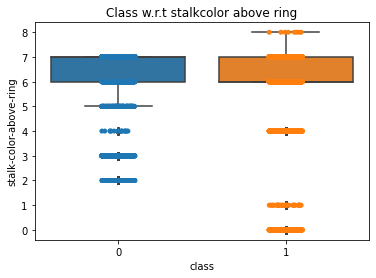

In [66]:
ax = sns.boxplot(x='class', 
                 y='stalk-color-above-ring',
                 data=data)
 
ax = sns.stripplot(x="class", 
                   y='stalk-color-above-ring',
                   data=data, 
                   jitter=True,
                   edgecolor="gray")
 
plt.title("Class w.r.t stalkcolor above ring",fontsize=12)
 
plt.show()

In [67]:
# 分离特征和标签
X = data.iloc[:,1:23]  # 特征
y = data.iloc[:, 0]  # 标签

In [68]:
# 归一化（Normalization）、标准化（Standardization）
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [69]:
# 1、实施pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)
 
# 2、得到相关系数
covariance = pca.get_covariance()
 
# 3、得到每个变量对应的方差值
explained_variance=pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 1.66634715e-34])

通过绘图来展示每个主成分的得分关系

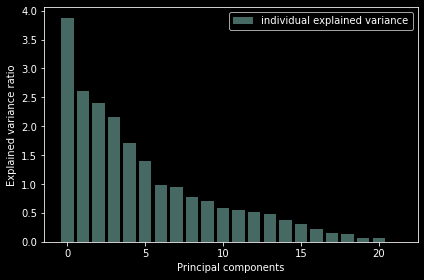

In [70]:
with plt.style.context("dark_background"):  # 背景
    plt.figure(figsize=(6,4))  # 大小
    
    plt.bar(range(22),  # 主成分个数
           explained_variance,  # 方差值
            alpha=0.5,  # 透明度
            align="center",
            label="individual explained variance"  # 标签
           )
    plt.ylabel('Explained variance ratio')  # 轴名称和图例
    plt.xlabel('Principal components')
    plt.legend(loc="best")
    plt.tight_layout()  # 自动调整子图参数

然后我们利用基于2个属性的数据来实施K-means聚类

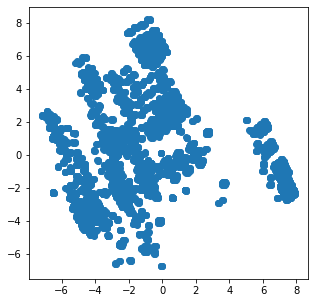

In [71]:
N = data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
 
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

实施聚类建模后的分布

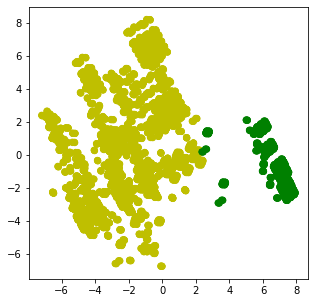

In [72]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,random_state=5)
 
N = data.values  # numpy数组形式
X_clustered = km.fit_predict(N)  # 建模结果0-1
 
label_color_map = {0:"g",  # 分类结果只有0和1，进行打标
                  1:"y"}
label_color = [label_color_map[l] for l in X_clustered]
 
plt.figure(figsize=(5,5))
# x = pca.fit_transform(N)
plt.scatter(x[:,0],x[:,1], c=label_color)
plt.show()

逻辑回归

数据集的划分：训练集和测试集占比为8-2

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [74]:
from sklearn.linear_model import LogisticRegression  # 逻辑回归（分类）
from sklearn.model_selection import cross_val_score  # 交叉验证得分
from sklearn import metrics  # 模型评价
 
# 建立模型
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [87]:
#预测结果
y_prob = model_LR.predict_proba(X_test)[:,1]
y_prob

array([5.54940674e-02, 7.91432676e-01, 9.99489280e-01, ...,
       9.47919130e-01, 9.55392117e-01, 1.00585046e-06])

In [88]:
#对于0.5标记为1，小于0.5标记为0
y_pred=np.where(y_prob > 0.5, 1, 0)
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [89]:
#查看具体的预测效果：
model_LR.score(X_test,y_pred)

1.0

In [90]:
#逻辑回归下的混淆矩阵：
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[815,  30],
       [ 36, 744]], dtype=int64)

In [91]:
#具体的auc值：
auc_roc =metrics.roc_auc_score(y_test,y_pred) #测试纸和预测值
auc_roc

0.9591715976331362

In [98]:
#真假阳性
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,y_prob)

roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.9903474434835382

Text(0.5, 0, 'False Positive Rate')

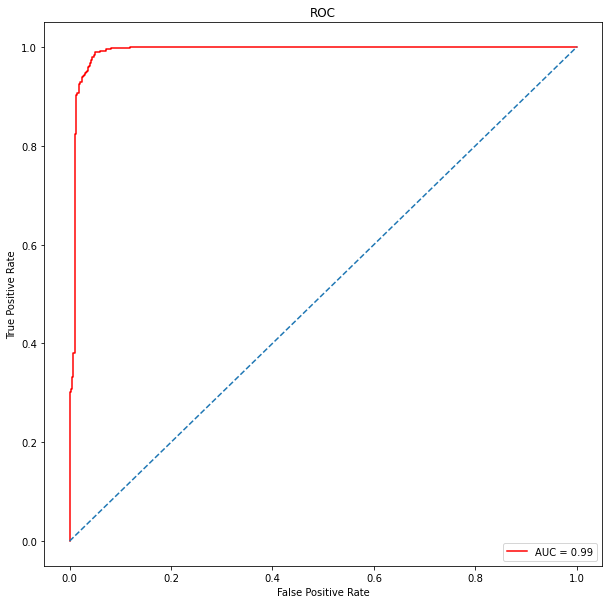

In [99]:
#ROC曲线
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("ROC")  # Receiver Operating Characteristic
plt.plot(false_positive_rate,
         true_positive_rate,
         color="red",
         label="AUC = %0.2f"%roc_auc
        )
 
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],linestyle="--")
plt.axis("tight")
# 真阳性：预测类别为1的positive；预测正确True
plt.ylabel("True Positive Rate") 
# 假阳性：预测类别为1的positive；预测错误False
plt.xlabel("False Positive Rate")

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
 
# 未优化的模型
LR_model= LogisticRegression()
# 待确定的参数
tuned_parameters = {"C":[0.001,0.01,0.1,1,10,100,1000],
                    "penalty":['l1','l2']  # 选择不同的正则方式，防止过拟合
                   }
# 网格搜索模块
from sklearn.model_selection import GridSearchCV
# 加入网格搜索功能
LR = GridSearchCV(LR_model, tuned_parameters,cv=10)
# 搜索之后再建模
LR.fit(X_train, y_train)
 
# 确定参数
print(LR.best_params_)
 
{'C': 100, 'penalty': 'l2'}

{'C': 100, 'penalty': 'l2'}


{'C': 100, 'penalty': 'l2'}